In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_cs v('expenses.csv' , header=0)
df= pd.DataFrame(df)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df = pd.get_dummies(df)

In [6]:
df.rename(columns={'sex_male': 'sex'}, inplace=True)

,age,bmi,children,charges,sex_female,sex,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
df.rename(columns={'smoker_yes': 'smoker'}, inplace=True)

In [8]:
list = ['sex_female' , 'smoker_no']
df = df.drop(list , axis=1)
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['bmi']]
y = df['charges']

model = LinearRegression()
model.fit(X, y)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [393.8730308]
Intercept: 1192.9372089611497


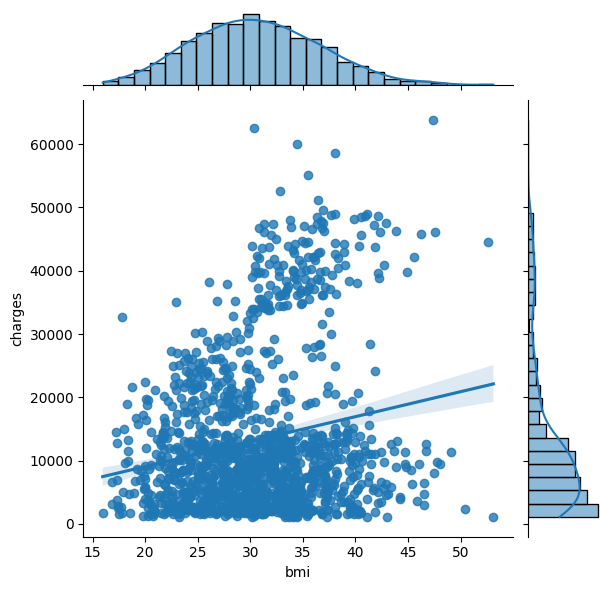

In [15]:
sns.jointplot(x='bmi', y='charges', data=df, kind='reg')